## DISCLAIMER - This data is from 1995 to 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('LaLiga_Matches_1995-2021.csv')
data.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0.0,0.0,D


In [3]:
data = data.rename(columns = {'FTHG': 'Home_Team_full Goals', 
                              'FTAG': 'Opponent_full Goals',
                              'FTR': 'Full_Result', 
                              'HTHG': 'Home_Team_1st_half_Goals',
                              'HTAG': 'Opponent_1st_half_Goals', 
                              'HTR': '1st_half_Result'}, inplace = False)

In [4]:
data.head()

,Season,Date,HomeTeam,AwayTeam,Home_Team_full Goals,Opponent_full Goals,Full_Result,Home_Team_1st_half_Goals,Opponent_1st_half_Goals,1st_half_Result
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0.0,0.0,D


In [5]:
data.dtypes

Season                       object
Date                         object
HomeTeam                     object
AwayTeam                     object
Home_Team_full Goals          int64
Opponent_full Goals           int64
Full_Result                  object
Home_Team_1st_half_Goals    float64
Opponent_1st_half_Goals     float64
1st_half_Result              object
dtype: object

In [6]:
data.shape

(10044, 10)

In [7]:
data.describe()

,Home_Team_full Goals,Opponent_full Goals,Home_Team_1st_half_Goals,Opponent_1st_half_Goals
count,10044.000000,10044.000000,10042.000000,10042.000000
mean,1.561928,1.118877,0.690799,0.485859
std,1.307706,1.116444,0.841658,0.698890
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,10.000000,8.000000,6.000000,6.000000


In [8]:
data['Home_Team_1st_half_Goals'].fillna(0, inplace=True)
data['Opponent_1st_half_Goals'].fillna(0, inplace=True)

In [9]:
data = data.astype({'Home_Team_1st_half_Goals' : int, 'Opponent_1st_half_Goals' : int})
data.dtypes

Season                      object
Date                        object
HomeTeam                    object
AwayTeam                    object
Home_Team_full Goals         int64
Opponent_full Goals          int64
Full_Result                 object
Home_Team_1st_half_Goals     int32
Opponent_1st_half_Goals      int32
1st_half_Result             object
dtype: object

In [10]:
data['Home_Team_2nd_half_Goals'] = data['Home_Team_full Goals'] - data['Home_Team_1st_half_Goals']
data['Opponent_2nd_half_Goals'] = data['Opponent_full Goals'] - data['Opponent_1st_half_Goals']
data.head()

,Season,Date,HomeTeam,AwayTeam,Home_Team_full Goals,Opponent_full Goals,Full_Result,Home_Team_1st_half_Goals,Opponent_1st_half_Goals,1st_half_Result,Home_Team_2nd_half_Goals,Opponent_2nd_half_Goals
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2,0,H,1,0
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3,0,H,0,0
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2,0,H,2,0
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1,1,D,3,0
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0,0,D,0,1


## Barcelona's performance in La Liga

In [11]:
def club_stat_win_loss(club_name) :
    
    '''
    shows performance of a single given club
    '''
    
    # home games
    masked_h = data[data['HomeTeam'] == club_name]
    home_game_wins = (masked_h['Full_Result'] == 'H').sum()
    home_game_losses = (masked_h['Full_Result'] == 'A').sum()
    home_game_draws = masked_h.shape[0] - home_game_losses - home_game_wins
    print('home game wins = ', home_game_wins)
    print('home game draws = ', home_game_draws)
    print('home game losses = ', home_game_losses)
    plt.pie([home_game_wins, home_game_losses, home_game_draws], labels=['home game wins', 'home game losses', 'home game draws'])
    plt.show()
    
    # away games
    masked_a = data[data['AwayTeam'] == club_name]
    away_game_wins = (masked_a['Full_Result'] == 'A').sum()
    away_game_losses = (masked_a['Full_Result'] == 'H').sum()
    away_game_draws = masked_a.shape[0] - away_game_losses - away_game_wins
    print('away game wins = ', away_game_wins)
    print('away game draws = ', away_game_draws)
    print('away game losses = ', away_game_losses)
    plt.pie([away_game_wins, away_game_losses, away_game_draws], labels=['away game wins', 'away game losses', 'away game draws'])
    plt.show()

home game wins =  377
home game draws =  76
home game losses =  45


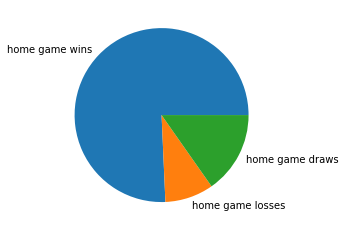

away game wins =  266
away game draws =  122
away game losses =  110


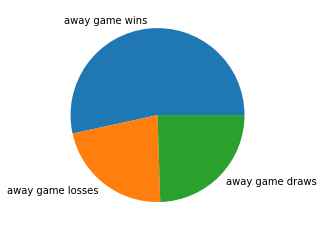

In [12]:
club_stat_win_loss('Barcelona')

## El Clasico stats

In [13]:
def club_club_stat(club1, club2) :
    
    '''
    shows the performance of 2 given clubs against each other
    '''
    
    # home games for club1
    masked_h1 = data[(data['HomeTeam'] == club1) & (data['AwayTeam'] == club2)]
    
    print('For home games of ', club1, ' :')
    
    print('total games = ', masked_h1.shape[0])
    
    win_club1_home = (masked_h1['Full_Result']=='H').sum()
    print('won by ', club1, ' = ', win_club1_home)
    
    win_club2_away = (masked_h1['Full_Result']=='A').sum()
    print('won by ', club2, ' = ', win_club2_away)
    
    print('draws = ', masked_h1.shape[0] - win_club1_home - win_club2_away)
    
    plt.pie([win_club1_home, win_club2_away, masked_h1.shape[0] - win_club1_home - win_club2_away], 
            labels=[club1, club2, 'draws'])
    plt.show()
    
    print()
    
    # home games for club2
    masked_h2 = data[(data['HomeTeam'] == club2) & (data['AwayTeam'] == club1)]
    
    print('For home games of ', club2, ' :')
    
    print('total games = ', masked_h2.shape[0])
    
    win_club2_home = (masked_h2['Full_Result']=='H').sum()
    print('won by ', club2, ' = ', win_club2_home)
    
    win_club1_away = (masked_h2['Full_Result']=='A').sum()
    print('won by ', club1, ' = ', win_club1_away)
    
    print('draws = ', masked_h2.shape[0] - win_club2_home - win_club1_away)
          
    plt.pie([win_club2_home, win_club1_away, masked_h2.shape[0] - win_club2_home - win_club1_away], 
            labels=[club2, club1, 'draws'])
    plt.show()

For home games of  Barcelona  :
total games =  26
won by  Barcelona  =  12
won by  Real Madrid  =  5
draws =  9


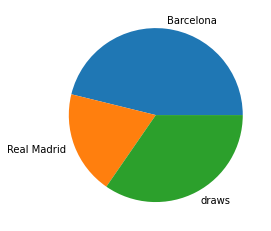


For home games of  Real Madrid  :
total games =  26
won by  Real Madrid  =  10
won by  Barcelona  =  11
draws =  5


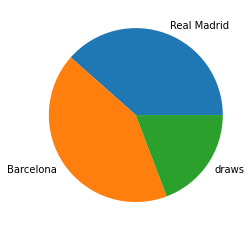

In [14]:
club_club_stat('Barcelona', 'Real Madrid') # El Clasico

## Barcelona's favourite clubs to play against

In [15]:
def club_against_clubs_stat(club_name, n=10) :
    
    '''
    shows the given club's performance against top n(10) clubs in La Liga for both home and away matches
    '''
    
    new_data = data.copy()
    new_data['won_home'] = (new_data['Full_Result'] == 'H')
    new_data['won_away'] = (new_data['Full_Result'] == 'A')
    new_data['drew'] = ((new_data['Full_Result'] != 'A') & (new_data['Full_Result'] != 'H'))
    
    # home games
    masked_h = new_data[new_data['HomeTeam'] == club_name]
    group_h = masked_h.groupby('AwayTeam')
    win_in_home = group_h['won_home'].sum().sort_values(ascending=False)[:n]
    plt.barh(win_in_home.keys(), win_in_home, color='red')
    plt.xlabel('matches won')
    plt.ylabel('opponent')
    plt.title('HOME GAMES MOST WINS')
    plt.show()
    
    # away games
    masked_a = new_data[new_data['AwayTeam'] == club_name]
    group_a = masked_a.groupby('HomeTeam')
    win_in_away = group_a['won_away'].sum().sort_values(ascending=False)[:n]
    plt.barh(win_in_away.keys(), win_in_away, color='green')
    plt.xlabel('matches won')
    plt.ylabel('opponent')
    plt.title('AWAY GAMES MOST WINS')
    plt.show()

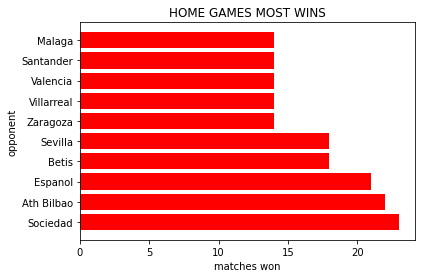

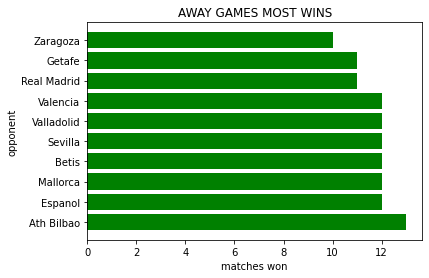

In [16]:
club_against_clubs_stat('Barcelona')

## Club's(Real Madrid) ability to win match after losing in 1st half ?

In [17]:
def comeback_rate(club_name) :
    
    '''
    the given club's ability to win the match after losing in the 1st half
    '''
    
    # as a home team
    masked_h = data[(data['HomeTeam'] == club_name) & (data['1st_half_Result'] == 'A')]
    total_matches_first_half_loss_home = masked_h.shape[0]
    total_matches_win_after_first_half_loss_home = (masked_h['Full_Result'] == 'H').sum()
    total_matches_loss_after_first_half_loss_home = masked_h.shape[0] - (masked_h['Full_Result'] == 'H').sum()
    print('for HOME matches, comeback rate : ', total_matches_win_after_first_half_loss_home*100//total_matches_first_half_loss_home, '%')
    plt.pie([total_matches_loss_after_first_half_loss_home, total_matches_win_after_first_half_loss_home],
            labels=['matches lost after first half down in home', 'matches won after first half down in home'])
    plt.show()
    
    # as an away team
    masked_a = data[(data['AwayTeam'] == club_name) & (data['1st_half_Result'] == 'H')]
    total_matches_first_half_loss_away = masked_a.shape[0]
    total_matches_win_after_first_half_loss_away = (masked_a['Full_Result'] == 'A').sum()
    total_matches_loss_after_first_half_loss_away = masked_a.shape[0] - (masked_a['Full_Result'] == 'A').sum()
    print('for AWAY matches, comeback rate : ', total_matches_win_after_first_half_loss_away*100//total_matches_first_half_loss_away, '%')
    plt.pie([total_matches_loss_after_first_half_loss_away, total_matches_win_after_first_half_loss_away],
            labels=['matches lost after first half down away', 'matches won after first half down away'])
    plt.show()

for HOME matches, comeback rate :  32 %


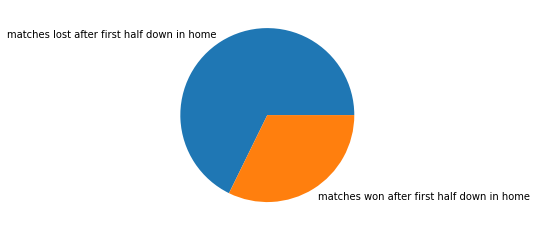

for AWAY matches, comeback rate :  12 %


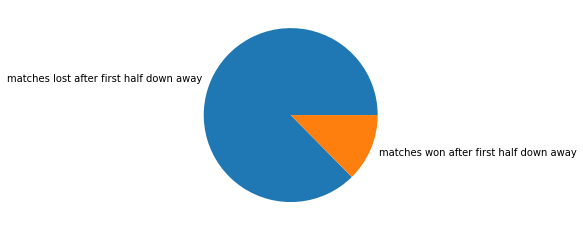

In [18]:
comeback_rate('Real Madrid')

## Club's(Real Madrid) ability to win match after leading in 1st half ?

In [19]:
def conversion_rate(club_name) :
    
    '''
    the given club's ability to win the match after leading in the 1st half
    '''
    
    # as a home team
    masked_h = data[(data['HomeTeam'] == club_name) & (data['1st_half_Result'] == 'H')]
    total_matches_first_half_win_home = masked_h.shape[0]
    total_matches_win_after_first_half_win_home = (masked_h['Full_Result'] == 'H').sum()
    total_matches_loss_after_first_half_win_home = masked_h.shape[0] - (masked_h['Full_Result'] == 'H').sum()
    print('for HOME matches, conversion rate : ', total_matches_win_after_first_half_win_home*100//total_matches_first_half_win_home, '%')
    plt.pie([total_matches_loss_after_first_half_win_home, total_matches_win_after_first_half_win_home],
            labels=['matches lost after first half up in home', 'matches won after first half up in home'])
    plt.show()
    
    # as an away team
    masked_a = data[(data['AwayTeam'] == club_name) & (data['1st_half_Result'] == 'A')]
    total_matches_first_half_win_away = masked_a.shape[0]
    total_matches_win_after_first_half_win_away = (masked_a['Full_Result'] == 'A').sum()
    total_matches_loss_after_first_half_win_away = masked_a.shape[0] - (masked_a['Full_Result'] == 'A').sum()
    print('for AWAY matches, conversion rate : ', total_matches_win_after_first_half_win_away*100//total_matches_first_half_win_away, '%')
    plt.pie([total_matches_loss_after_first_half_win_away, total_matches_win_after_first_half_win_away],
            labels=['matches lost after first half up away', 'matches won after first half up away'])
    plt.show()

for HOME matches, conversion rate :  95 %


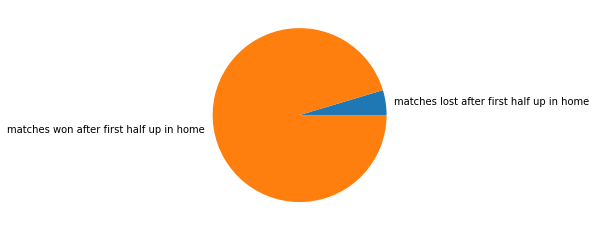

for AWAY matches, conversion rate :  84 %


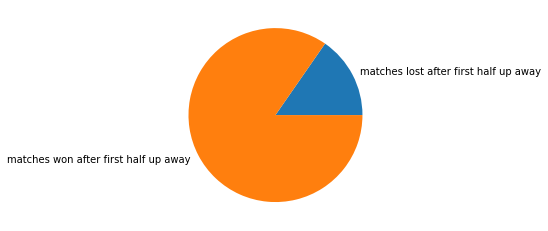

In [20]:
conversion_rate('Real Madrid')

## which teams are the hardest to play in 1st Half for a club(eg. - Barcelona) ?

In [21]:
def diff_first_half(club_name, n=10) :
    
    # home
    print('FOR HOME MATCHES :')
    masked_h = data[data['HomeTeam'] == club_name]
    group_h = masked_h.groupby('AwayTeam')['Opponent_1st_half_Goals'].sum().sort_values(ascending=False)[:n]
    plt.barh(group_h.keys(), group_h, color='orange')
    plt.xlabel('goals')
    plt.ylabel('opponent')
    plt.show()
    
    # away
    print('FOR AWAY MATCHES :')
    masked_a = data[data['AwayTeam'] == club_name]
    group_a = masked_a.groupby('HomeTeam')['Home_Team_1st_half_Goals'].sum().sort_values(ascending=False)[:n]
    plt.barh(group_a.keys(), group_a, color='purple')
    plt.xlabel('goals')
    plt.ylabel('opponent')
    plt.show()

FOR HOME MATCHES :


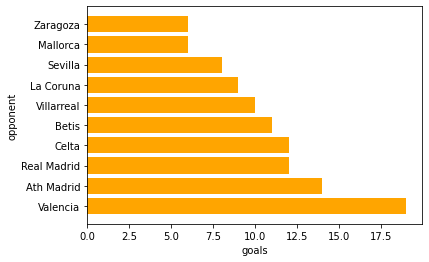

FOR AWAY MATCHES :


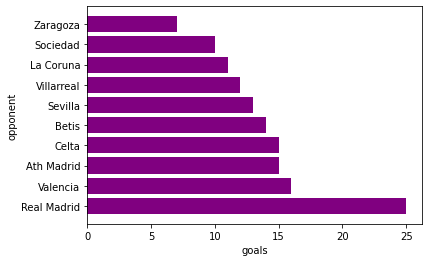

In [22]:
diff_first_half('Barcelona')

## which teams are the hardest to play in 2nd Half for a club(eg. - Real Madrid) ?

In [23]:
def diff_second_half(club_name, n=10) :
    
    # home
    print('FOR HOME MATCHES :')
    masked_h = data[data['HomeTeam'] == club_name]
    group_h = masked_h.groupby('AwayTeam')['Opponent_2nd_half_Goals'].sum().sort_values(ascending=False)[:n]
    plt.barh(group_h.keys(), group_h, color='orange')
    plt.xlabel('goals')
    plt.ylabel('opponent')
    plt.show()
    
    # away
    print('FOR AWAY MATCHES :')
    masked_a = data[data['AwayTeam'] == club_name]
    group_a = masked_a.groupby('HomeTeam')['Home_Team_2nd_half_Goals'].sum().sort_values(ascending=False)[:n]
    plt.barh(group_a.keys(), group_a, color='purple')
    plt.xlabel('goals')
    plt.ylabel('opponent')
    plt.show()

FOR HOME MATCHES :


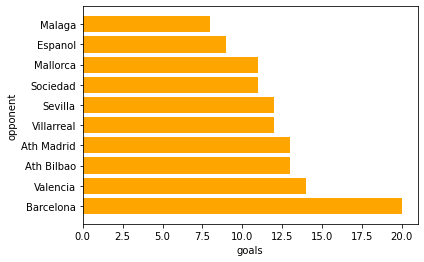

FOR AWAY MATCHES :


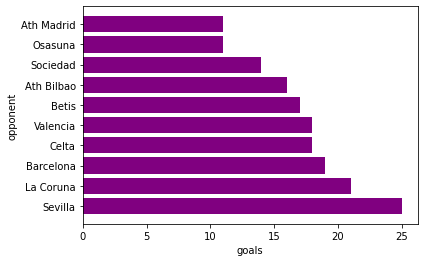

In [24]:
diff_first_half('Real Madrid')